# REGRESION LINEAL

#### Libreria

In [31]:
# Librerias 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sklearn import datasets

#### Datos

In [32]:
# n_puntos determina la cantidad de datos con los que se trabajara
n_puntos = 100
xi, yi = datasets.make_regression(n_samples=n_puntos, n_features=1, noise=20)
# Datos prueba
#xi=[2,2.4,1.5,3.5,3.5,3.5,3.7,3.7,3.7,2.4,2.4,3.5,5.9,5.9,4.7,4.7,4.7,4.7]
#yi=[196,221,136,255,244,230,232,255,267,212,225,239,359,359,338,354,338,354]
xi = np.array(xi,dtype=float)
yi = np.array(yi, dtype=float)
xi= np.hstack(xi) # cambio de dimesion del array
#print('xi =', xi)
#print('yi =', yi)


# Método minimos cuadrados

#### Archivo de salida

In [33]:
# Cabecera de archivo
archivo = open("Practica_01.txt",'w')
archivo.write('\n ==== PRACTICA 01 - INTELIGENCIA ARTIFICIAL === \n')
archivo.write('PRESENTADO POR : Heberth del Carpio Maraza\n')
archivo.writelines('PRACTICA 01    : Metodo de Minimos cuadrados.\n')

archivo.write('\n====  DATOS === \n')
archivo.write('Variable Independiente  X : \n')
archivo.write(str(xi) + '\n')
archivo.write('Variable Dependiente Y : \n')
archivo.write(str(yi) + '\n')


1419

#### Variables para calculo

In [34]:
n = len(xi)
archivo.write('\n === Variables === \n')
archivo.write('Longitud : ' + str(n) + '\n')
x_media = np.mean(xi)
archivo.write('Media de x : ' + str(x_media) + '\n')
y_media= np.mean(yi)
archivo.write('Media de y : ' + str(y_media) + '\n')
x_sumatoria = np.sum(xi)
archivo.write('Sumatoria de x : ' + str(x_sumatoria) + '\n')
y_sumatoria = np.sum(yi)
archivo.write('Sumatoria de y : ' + str(y_sumatoria) + '\n')
#xy_sumatoria = np.sum(xi*yi)
xy_sumatoria = np.dot(xi,yi)
archivo.write('Sumatoria de xy : ' + str(xy_sumatoria) + '\n')
x2_sumatoria = np.sum(xi*xi)
archivo.write('Sumatoria de x2 : ' + str(x2_sumatoria) + '\n')
y2_sumatoria = np.sum(yi*yi)
archivo.write('Sumatoria de y2 : ' + str(y2_sumatoria) + '\n')
#print(x_sumatoria,y_sumatoria,xy_sumatoria,x2_sumatoria) # Verificador

36

#### Calculo de funcion lineal

$ w_1 = \frac{n\sum {x_iy_i}-\sum x_i\sum y_i}{n\sum x_i^2-(\sum x_i)^2} $  

$ w_0 =\frac{\sum{y}-w_1\bar{x}}{n}$

$ f(x) = w_0 + w_1x $

In [35]:
w1=(n*xy_sumatoria-x_sumatoria*y_sumatoria)/(n*x2_sumatoria-x_sumatoria**2)
#w0= y_media - w1*x_media
w0=(y_sumatoria-w1*x_sumatoria)/n
x= sym.Symbol('X')
f = w0 + w1*x
fx = sym.lambdify(x,f)
fi = fx(xi)
archivo.write(str(fi))

1416

In [36]:
print ('y media = ',y_media)
print ('f=',f)

y media =  -10.436606961170845
f= 69.0949200436159*X - 0.714274584079924


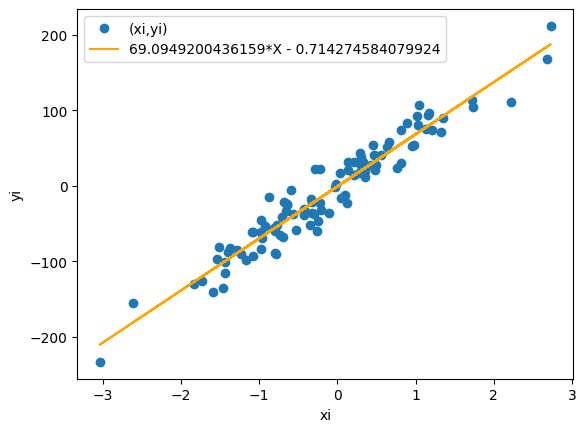

In [37]:
plt.plot(xi,yi,'o',label='(xi,yi)')
#plt.stem(xi,yi,bottom=y_media, linefmt = ':')
plt.plot(xi,fi,color='orange', label=f)
plt.xlabel('xi')
plt.ylabel('yi')
plt.legend()
plt.show()


In [38]:
# coeficiente de correlacion
numerador = (n*xy_sumatoria - x_sumatoria*y_sumatoria)
raiz1 = np.sqrt(n*x2_sumatoria-x_sumatoria**2)
raiz2 = np.sqrt(n*y2_sumatoria-y_sumatoria**2)
r= numerador/(raiz1*raiz2)
#coeficiente de determinacion
r2 = r**2
r2_porcentaje = np.around(r2*100,2)
print(r2)
print(r2_porcentaje)

0.9311176334212895
93.11


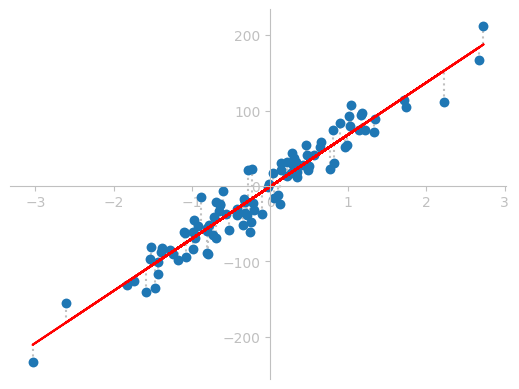

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('silver')
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('silver')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='y', colors='silver')
ax.tick_params(axis='x', colors='silver')
for i in range(0,n,1):
    y0=np.min([yi[i],fi[i]])
    y1=np.max([yi[i],fi[i]])
    plt.vlines(xi[i],y0,y1,color='silver', linestyle='dotted')
plt.plot(xi,yi,'o')
plt.scatter(xi, yi,alpha=0.3)
plt.plot(xi,fi,color='red')